# auto layout 排版

## 线性规划 ,课后可了解下pulp

In [14]:
import pulp

#目标函数的系数
z = [2, 3, 1]

#约束
a = [[1, 4, 2], [3, 2, 0]]
b = [8, 6]

#确定最大化最小化问题，最大化只要把Min改成Max即可
m = pulp.LpProblem(sense=pulp.LpMinimize)
print(m)

#定义三个变量放到列表中
x = [pulp.LpVariable('x_'+str(i), lowBound=0) for i in [1,2,3]]
print(x)


'''定义目标函数，lpDot可以将两个列表的对应位相乘再加和
z = [2, 3, 1]
x = [x_1, x_2, x_3]

pulp.lpDot(z, x)

相当于

z[0]*x[0]+z[1]*x[0]+z[2]*x[2]

'''
m += pulp.lpDot(z, x)
print(m)

#设置约束条件
for i in range(len(a)):
    m += (pulp.lpDot(a[i], x) >= b[i])
print(m) 

#求解
m.solve()

#输出结果
print(f'优化结果：{pulp.value(m.objective)}')
print(f'参数取值：{[pulp.value(var) for var in x]}')


NoName:
MINIMIZE
None
VARIABLES

[x_1, x_2, x_3]
NoName:
MINIMIZE
2*x_1 + 3*x_2 + 1*x_3 + 0
VARIABLES
x_1 Continuous
x_2 Continuous
x_3 Continuous

NoName:
MINIMIZE
2*x_1 + 3*x_2 + 1*x_3 + 0
SUBJECT TO
_C1: x_1 + 4 x_2 + 2 x_3 >= 8

_C2: 3 x_1 + 2 x_2 >= 6

VARIABLES
x_1 Continuous
x_2 Continuous
x_3 Continuous

优化结果：7.0
参数取值：[2.0, 0.0, 3.0]


In [23]:
'''Min z=y2-y1-height
height<=H*0.3
y2<=H*0.5
y2>=y1
y1>=H*0.1
height>=y1
y2-y1-height>=H*0.1
'''


'Min z=y2-y1-height\nheight<480*0.3\ny2<480*0.5\ny2>96\ny1>48\nheight>96\n'

In [31]:
prob=pulp.LpProblem(sense=pulp.LpMinimize)
H=480
y2=pulp.LpVariable('y2', lowBound =int(H*0.1))
y1=pulp.LpVariable('y1', lowBound =int(H*0.1))
height=pulp.LpVariable('height', lowBound =int(H*0.1))
 
prob+=y2-y1-height

prob+=height<=int(H*0.3)
prob+=y2<=int(H*0.5)
prob+=y2-y1-height>=int(H*0.1)

prob.solve()
print(f'优化结果：{pulp.value(prob.objective)}')
print(f'参数取值：{[pulp.value(var) for var in [y1,y2,height]]}')


优化结果：48.0
参数取值：[48.0, 144.0, 48.0]


## cassowary
#### 所谓编程范式（programming paradigm），指的是计算机编程的基本风格或典范模式。
#### 约束编程，声明式编程

In [ ]:
# pip install cassowary
#https://cassowary.readthedocs.io/en/latest/

In [20]:
# demo

from cassowary import SimplexSolver,Variable

# Create a variable with a default value.
x1 = Variable('x1')
x2 = Variable('x2')
x3 = Variable('x4')

# Define the constraint
solver.add_constraint(x1 + 3 * x2 <= 4 * x3 + 2)
solver.add_constraint(x1 >=3)


Required:{1.0}(-3.0 + x1[3.0])

In [23]:
x2.value

-0.33333333333333337

In [27]:
from cassowary import SimplexSolver, Variable,STRONG, WEAK

# 中间点必须位于左右点之间；
# 左点必须至少在右点的左边10；
# 所有点必须在0-100范围内。

solver = SimplexSolver()

left = Variable('left')
middle = Variable('middle')
right = Variable('right')

solver.add_constraint(middle == (left + right) / 2)
solver.add_constraint(right == left + 10)
solver.add_constraint(right <= 100)
solver.add_constraint(left >= 10,strength=STRONG)

Strong:{1.0}(-10.0 + left[90.0])

In [28]:
#求解器提供了一种可能的解决方案
left.value,middle.value,right.value

(90.0, 95.0, 100.0)

In [29]:
#固定值
middle.value = 45.0
solver.add_stay(middle)
left.value,middle.value,right.value

(40.0, 45.0, 50.0)

In [ ]:
# Cassowary允许设置约束都具有强度
# REQUIRED STRONG MEDIUM WEAK

## 布局的例子

In [32]:
from cassowary import SimplexSolver, Variable,STRONG,WEAK

solver = SimplexSolver()
class Button(object):
    def __init__(self, identifier):
        self.left = Variable('left' + identifier, 0)
        self.width = Variable('width' + identifier, 0)

    def __repr__(self):
        return u'(x=%s, width=%s)' % (self.left.value, self.width.value)

In [33]:
b1 = Button('b1')
b2 = Button('b2')
left_limit = Variable('left', 0)
right_limit = Variable('width', 0)

left_limit.value = 0
solver.add_stay(left_limit)
solver.add_stay(right_limit, WEAK)

stay:Weak:{1.0}(-1.0*width[0.0])

In [34]:
# The two buttons are the same width
solver.add_constraint(b1.width == b2.width)

# Button1 starts 50 from the left margin.
solver.add_constraint(b1.left == left_limit + 50)

# Button2 ends 50 from the right margin
solver.add_constraint(left_limit + right_limit == b2.left + b2.width + 50)

# Button2 starts at least 100 from the end of Button1. This is the
# "elastic" constraint in the system that will absorb extra space
# in the layout.
solver.add_constraint(b2.left == b1.left + b1.width + 100)

# Button1 has a minimum width of 87
solver.add_constraint(b1.width >= 87)

# Button1's preferred width is 87
solver.add_constraint(b1.width == 87, strength=STRONG)

# Button2's minimum width is 113
solver.add_constraint(b2.width >= 113)

# Button2's preferred width is 113
solver.add_constraint(b2.width == 113, strength=STRONG)

Strong:{1.0}(113.0 + -1.0*widthb2[113.0])

In [37]:
b1,b2,right_limit.value

((x=50.0, width=113.0), (x=263.0, width=113.0), 426.0)

# 遗传算法

## OneMax问题是遗传算法的入门问题
## 如何使一段长度固定的二进制字符串所有位置上数字之和最大。

个体：个体即为问题的解，这个问题中个体可以直观的定义为一个长度为100列表（List），列表上每个元素为0或1.

种群：种群即所有个体的合集，我们可以把种群定义为所有个体组成的列表。

选择：使用锦标赛法(Tournament Selection)

杂交：使用单点杂交法(Singe-Point Crossover)

突变：使用位翻转突变法(Flip Bit Mutation)

适应度函数： 我们的目标是使字符串上所有数字之和最大，适应度函数可以直观的定义为列表中所有数字之和


gen	nevals	max	avg  
0  	200   	65 	50.35
1  	191   	62 	52.905
2  	175   	65 	55.225
3  	189   	67 	57.345
4  	169   	68 	59.25 
5  	176   	72 	61.285
6  	170   	73 	63.345
7  	182   	73 	65.165
8  	179   	74 	66.835
9  	181   	78 	68.475
10 	188   	80 	70.13 
11 	178   	82 	71.95 
12 	189   	81 	73.755
13 	188   	82 	75.145
14 	194   	83 	76.755
15 	176   	83 	78.29 
16 	182   	83 	79.35 
17 	169   	85 	80.34 
18 	177   	86 	81.37 
19 	178   	86 	82.435
20 	184   	87 	83.31 
21 	179   	88 	84.175
22 	179   	89 	84.835
23 	179   	90 	85.575
24 	188   	91 	86.525
25 	189   	93 	87.55 
26 	181   	94 	88.44 
27 	190   	94 	89.31 
28 	185   	95 	89.94 
29 	174   	96 	90.7  
30 	188   	98 	91.41 
31 	180   	98 	92.195
32 	177   	98 	93.005
33 	179   	98 	93.83 
34 	175   	98 	94.555
35 	185   	99 	95.165
36 	179   	99 	95.725
37 	188   	99 	96.345
38 	182   	100	97.04 
39 	184   	100	97.63 
40 	183   	100	98.03 
41 	177   	100	98.37 
42 	192   	100	98.685
43 	186   	100	98.985
44 	175   	1

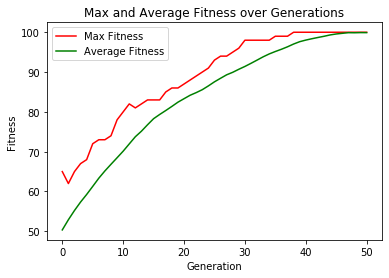

In [1]:
#导入模块
from deap import base,creator,tools,algorithms
import random
import numpy as np
import matplotlib.pyplot as plt

toolbox = base.Toolbox()

# 参数:
INDIVIDUAL_LENGTH = 100  # length of bit string to be optimized
POPULATION_SIZE = 200
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual
MAX_GENERATIONS = 50
random.seed(39)

# 3.create individual and population

#优化目标：单变量，求最大值
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
#创建Individual类，继承list
creator.create("Individual", list, fitness=creator.FitnessMax)

# 生成个体
toolbox.register("Binary", random.randint, 0, 1)
toolbox.register("createIndividual", tools.initRepeat, creator.Individual, toolbox.Binary, INDIVIDUAL_LENGTH)

# 生成初始族群
toolbox.register("createPopulation", tools.initRepeat, list, toolbox.createIndividual)


# 4. define evaluation function
# 定义评价函数
def evalOneMax(individual):
    return sum(individual),
toolbox.register("evaluate",evalOneMax)

# 5. define operators
#配种选择,方式1,锦标赛方式
toolbox.register("select", tools.selTournament, tournsize=2)
#变异,单点交叉
toolbox.register("mate", tools.cxOnePoint)
#突变,位翻转突变
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/INDIVIDUAL_LENGTH)


# Genetic Algorithm flow:
def main():
    # create population
    population = toolbox.createPopulation(n=POPULATION_SIZE)
    # initialize statistics
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", np.max)
    stats.register("avg", np.mean)

    '''population
           toolbox
           cxpb –配对两个体的概率。
           mutpb –个体变异的概率。
           ngen –世代数。
           stats –一个Statistics就地更新的对象，可选。
           verbose –是否记录统计信息。'''
        
    # 遗传算法   Genetic Algorithm
    population, logbook = algorithms.eaSimple(
        population, 
        toolbox, 
        cxpb=P_CROSSOVER, 
        mutpb=P_MUTATION, 
        ngen=MAX_GENERATIONS,
        stats=stats, 
        verbose=True)



    # gather statistics
    maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

    # plot statistics:
    plt.plot(maxFitnessValues, color='red',label="Max Fitness")
    plt.plot(meanFitnessValues, color='green',label="Average Fitness")
    plt.legend()
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.title('Max and Average Fitness over Generations')
    plt.show()

main()

## 图形

### 在方格内寻找面积最大的三角形，输出三角形的坐标定位

In [5]:
#通过三点直接求面积
def calc_area(p1, p2, p3):
    (x1, y1), (x2, y2), (x3, y3) = p1,p2,p3
    return 0.5 * abs(x2 * y3 + x1 * y2 + x3 * y1 - x3 * y2 - x2 * y1 - x1 * y3)
calc_area((10,100),(20,120),(0,0))

400.0

/Users/shadow/opt/anaconda3/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/Users/shadow/opt/anaconda3/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


[7, 9, 13, 1, 4, 14]
gen	nevals	max  	avg   	min
0  	200   	229.5	56.405	0  
1  	193   	258  	68.8625	0  
2  	188   	280  	77.5625	0  
3  	188   	304  	85.175 	0  
4  	177   	324  	92.1   	0  
5  	185   	368  	105.61 	0  
6  	178   	336  	104.328	0  
7  	183   	327  	118.04 	0  
8  	177   	336  	118.427	0  
9  	188   	331.5	125.957	0  
10 	177   	385  	155.042	0  
11 	184   	367.5	163.433	0  
12 	180   	364.5	179.238	0  
13 	181   	364.5	201.218	0  
14 	186   	367.5	230.077	0  
15 	174   	367.5	248.792	0  
16 	184   	367.5	270.255	0  
17 	183   	367.5	265.685	0  
18 	184   	367.5	264.085	0  
19 	190   	364.5	275.438	0  
20 	183   	364  	279.605	0  
21 	186   	364  	280.63 	0  
22 	186   	364  	295.988	0  
23 	180   	364  	299.613	0  
24 	180   	364  	312.293	0  
25 	184   	364  	334.235	0  
26 	186   	364  	333.28 	0  
27 	184   	364  	327.47 	0  
28 	186   	364  	333.01 	0  
29 	178   	364  	325.78 	0  
30 	182   	364  	340.34 	0  
31 	175   	364  	336.7  	0  
32 	188   	364  	329.42 

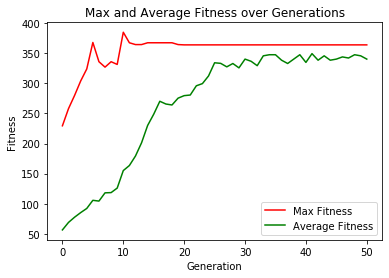

In [24]:
#导入模块
from deap import base,creator,tools,algorithms
import random
import numpy as np
import matplotlib.pyplot as plt

toolbox = base.Toolbox()

# 参数:
INDIVIDUAL_LENGTH = 6  # 
GRID_RANGE=20
POPULATION_SIZE = 200
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual
MAX_GENERATIONS = 50
random.seed(39)

# 3.create individual and population

#优化目标：单变量，求最大值 area
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
#创建Individual类，继承list
creator.create("Individual", list, fitness=creator.FitnessMax)

# 生成个体
toolbox.register("Indices", random.sample, range(1,GRID_RANGE-1),INDIVIDUAL_LENGTH)
#toolbox.register("Indices", random.randint, 0, 1)
toolbox.register("createIndividual", tools.initIterate, creator.Individual, toolbox.Indices)
print(toolbox.createIndividual())

# 生成初始族群
toolbox.register("createPopulation", tools.initRepeat, list, toolbox.createIndividual)


# 4. define evaluation function
# 定义评价函数
def evalOneMax(individual):
    
    e=calc_area((individual[0],individual[1]),(individual[2],individual[3]),(individual[4],individual[5]))*min(individual)
    
    return e,

toolbox.register("evaluate",evalOneMax)

# 5. define operators
#配种选择,方式1,锦标赛方式
toolbox.register("select", tools.selTournament, tournsize=2)
#变异,单点交叉
toolbox.register("mate", tools.cxOnePoint)
#突变,位翻转突变
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/INDIVIDUAL_LENGTH)


# Genetic Algorithm flow:
def main():
    # create population
    population = toolbox.createPopulation(n=POPULATION_SIZE)
    # initialize statistics
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", np.max)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    
    '''population
           toolbox
           cxpb –配对两个体的概率。
           mutpb –个体变异的概率。
           ngen –世代数。
           stats –一个Statistics就地更新的对象，可选。
           verbose –是否记录统计信息。'''
        
    # 遗传算法   Genetic Algorithm
    population, logbook = algorithms.eaSimple(
        population, 
        toolbox, 
        cxpb=P_CROSSOVER, 
        mutpb=P_MUTATION, 
        ngen=MAX_GENERATIONS,
        stats=stats, 
        verbose=True)


    # 输出最优解
    index = np.argmax([ind.fitness for ind in population])
    x = population[index] # 解码
    print('当前最优解：'+ str(x) + '\t对应的函数值为：' + str(population[index].fitness))
    
    # gather statistics
    maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")
    #print(population)
    # plot statistics:
    plt.plot(maxFitnessValues, color='red',label="Max Fitness")
    plt.plot(meanFitnessValues, color='green',label="Average Fitness")
    plt.legend()
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.title('Max and Average Fitness over Generations')
    plt.show()

main()

## 动态规划

## 找到和最大的子矩阵

In [82]:
# 找到和最大的子矩阵
# function to find maximum sum width x height sub-matrix

def findMaxSumSubMatrix(mat, width,height):

    # M x N 矩阵
    (M, N) = (len(mat), len(mat[0]))

    # pre-process the input matrix such that sum[i][j] stores
    # 总和 (0, 0) to (i, j)
    sum = [[0 for x in range(N)] for y in range(M)]
    
    sum[0][0] = mat[0][0]
     
    # 预处理第一行
    for j in range(1, N):
        sum[0][j] = mat[0][j] + sum[0][j - 1]
    
    # 预处理第一列
    for i in range(1, M):
        sum[i][0] = mat[i][0] + sum[i - 1][0]
    
    # 处理剩下的
    for i in range(1, M):
        for j in range(1, N):
            sum[i][j] = mat[i][j] + sum[i - 1][j] + sum[i][j - 1] - sum[i - 1][j - 1]

    max = float('-inf')
     
    # find maximum sum sub-matrix

    # 从 (width - 1, heigth - 1) 开始 and consider each
    # sub-matrix of size width x height
    for i in range(width - 1, M):
        for j in range(height - 1, N):

            # Note (i, j) is bottom right corner coordinates of
            # square sub-matrix of size k

            total = sum[i][j]
            if i - width >= 0:
                total = total - sum[i - width][j]

            if j - height >= 0:
                total = total - sum[i][j - height]

            if i - width >= 0 and j - height >= 0:
                total = total + sum[i - width][j -height]

            if total > max:
                max = total
                p = (i, j)

    # returns coordinates of bottom right corner of sub-matrix
    return p


# 3 x 3 matrix
mat = [
        [0,0,0,255 ],
        [0 ,0,0,255],
        [0,0,255,255 ],
        [0,255,255,255 ]
    ]

# sub-matrix size
width = 2
height=3

# p contains bottom right corner coordinates of sub-matrix
(x, y) = findMaxSumSubMatrix(mat, width,height)
print("左上角")
print(x-width+1,y-height+1)
print("右下角")
print(x,y)
print("子矩阵")
# print maximum sum sub-matrix
for i in range(width):
    for j in range(height):
        print(mat[i + x - width + 1][j + y - height + 1], end=' ')
    print()

左上角
2 1
右下角
3 3
子矩阵
0 255 255 
255 255 255 


# DEMO

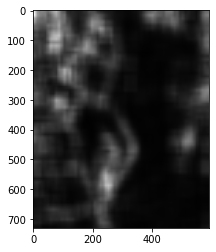

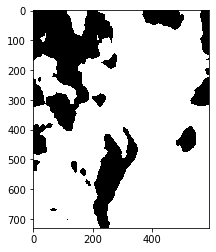

In [287]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('img/Maryam-Razavi_pitsitoppi590.jpg')

#像素3的高斯模糊，过滤掉小噪点
img = cv2.GaussianBlur(img,(9,9),0)  

#StaticSaliencySpectralResidual_create
#
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
(success, saliency_map) = saliency.computeSaliency(img)
saliency_map = (saliency_map * 255).astype("uint8")

#saliency_map=cv2.dilate(saliency_map,(27,27),iterations = 1)

plt.imshow(cv2.cvtColor(saliency_map,cv2.COLOR_BGR2RGB))
plt.show()

thresh_map = 255-cv2.threshold(saliency_map, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(cv2.cvtColor(thresh_map,cv2.COLOR_GRAY2RGB))
plt.show()

# _, labels = cv2.connectedComponents(thresh_map)
# print(labels)


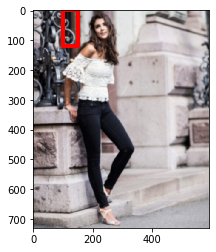

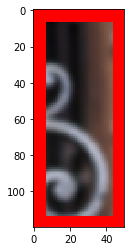

In [280]:
# 演示1 绘制矩形 与 截取图片 的差异

x=100
y=0 
w=50 
h=120
cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),12)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(
    cv2.cvtColor(
        img[y:y+h,x:x+w],
        cv2.COLOR_BGR2RGB)
)
plt.show()


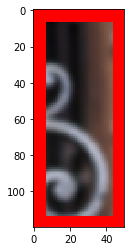

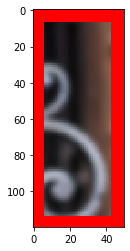

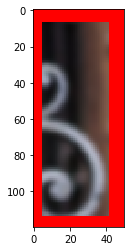

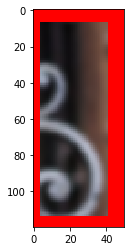

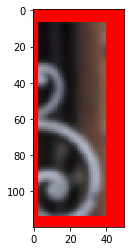

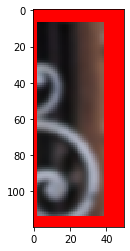

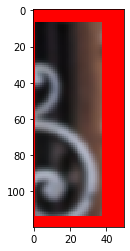

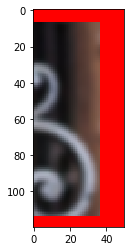

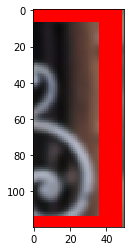

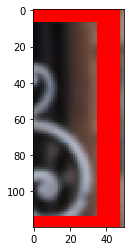

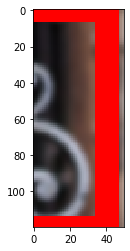

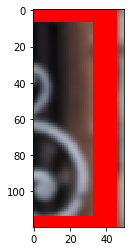

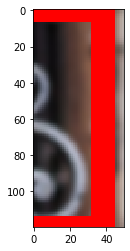

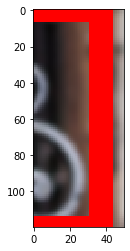

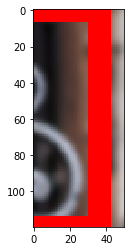

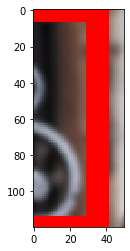

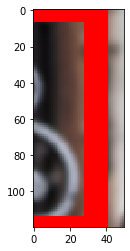

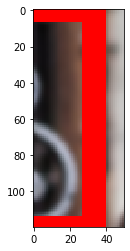

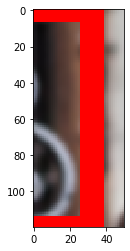

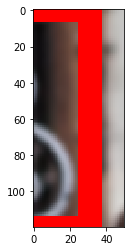

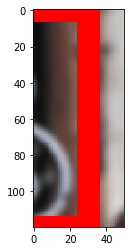

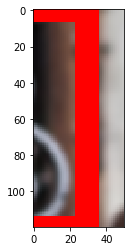

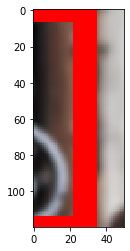

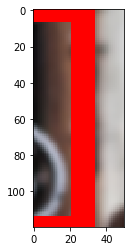

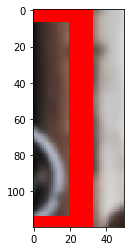

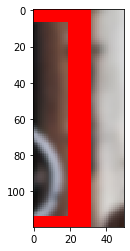

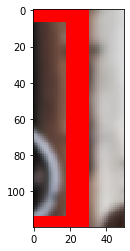

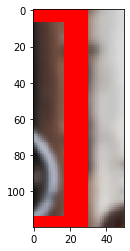

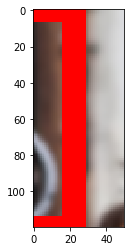

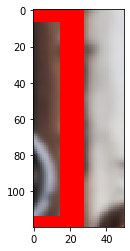

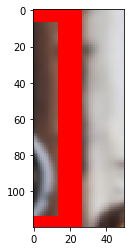

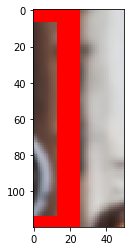

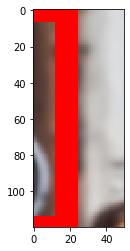

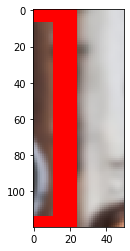

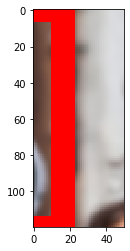

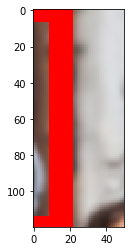

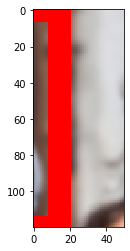

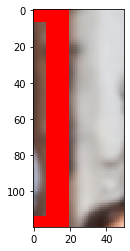

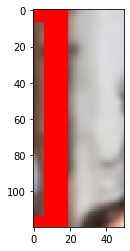

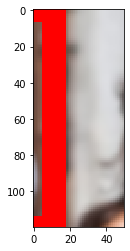

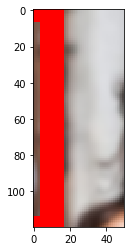

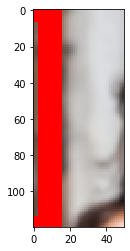

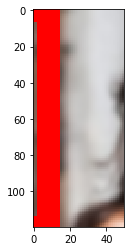

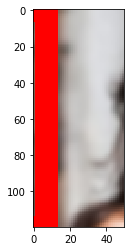

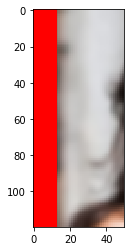

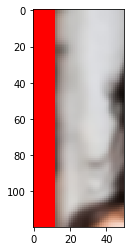

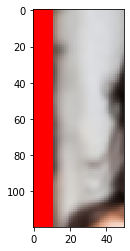

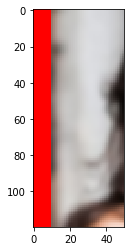

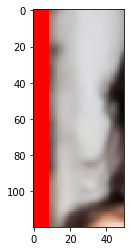

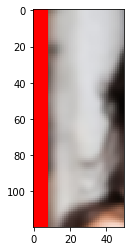

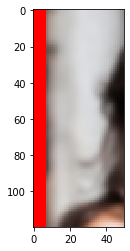

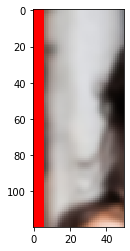

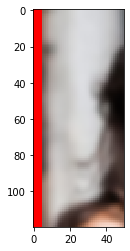

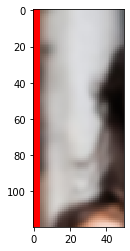

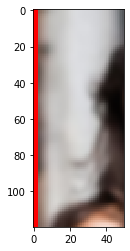

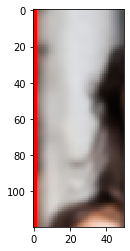

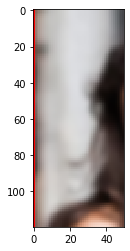

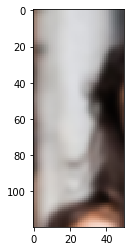

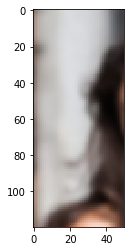

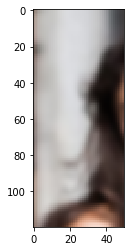

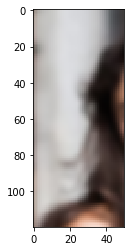

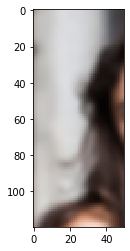

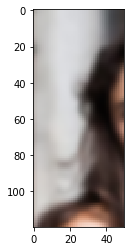

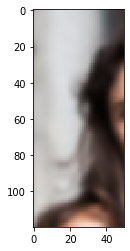

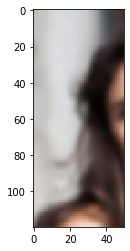

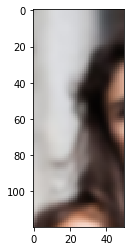

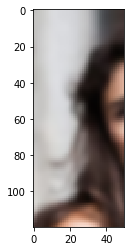

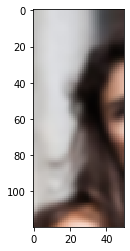

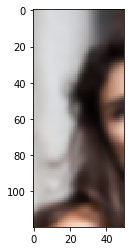

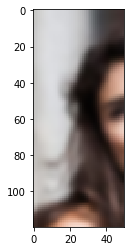

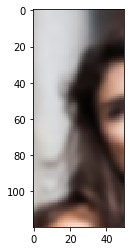

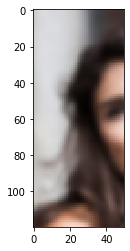

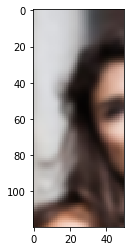

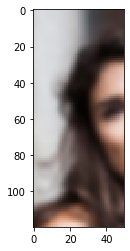

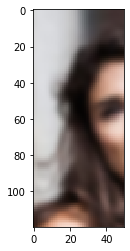

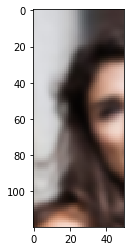

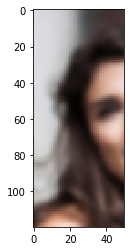

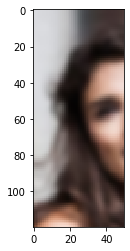

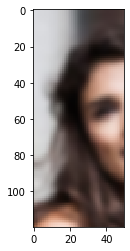

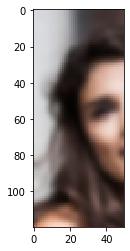

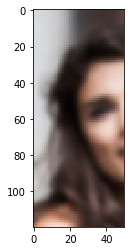

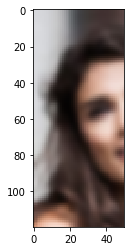

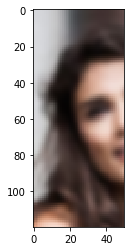

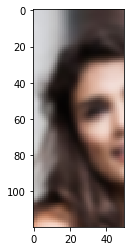

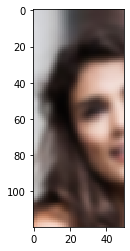

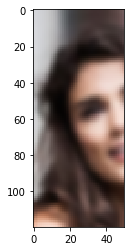

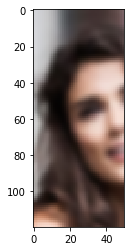

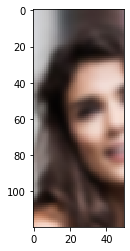

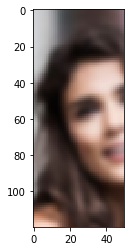

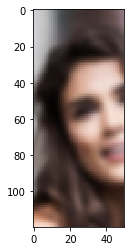

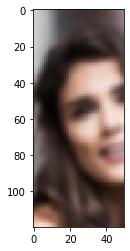

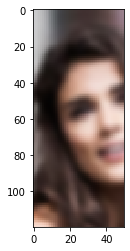

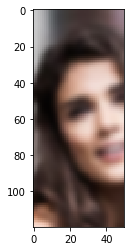

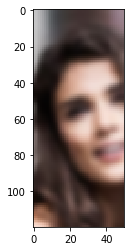

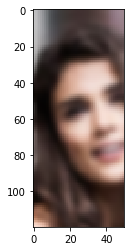

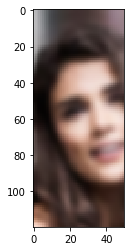

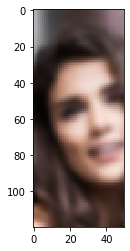

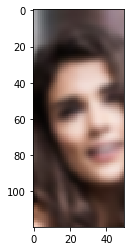

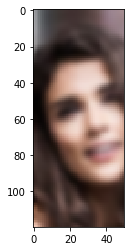

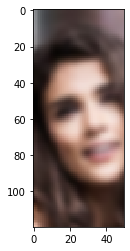

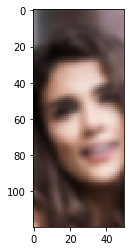

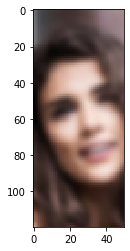

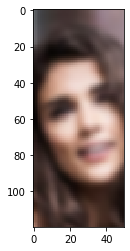

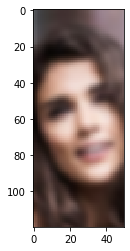

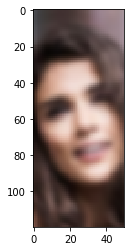

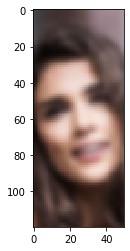

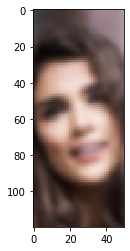

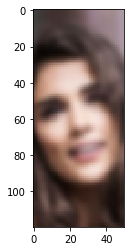

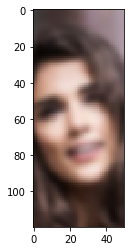

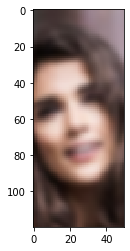

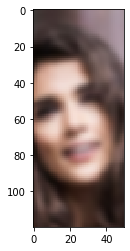

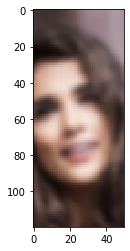

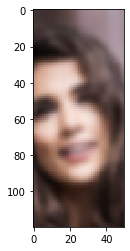

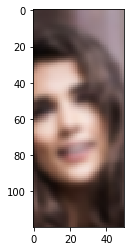

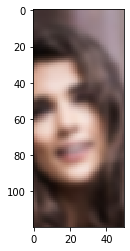

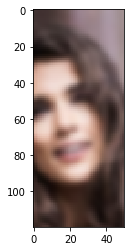

KeyboardInterrupt: 

In [281]:
# 演示2 固定尺寸矩阵 沿x轴移动
x=100
y=0 
w=50 
h=120
for i in range(img.shape[1]):
    
# cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),12)
# plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
# plt.show()

    plt.imshow(
        cv2.cvtColor(
            img[y:y+h,x+i:x+i+w],
            cv2.COLOR_BGR2RGB)
    )
    plt.show()

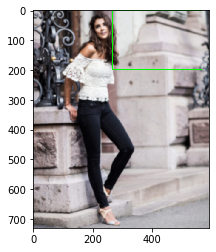

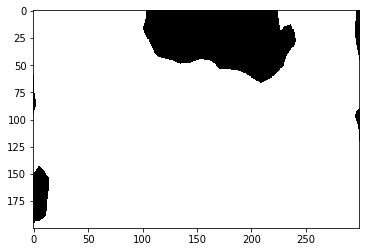

In [289]:
#演示3 按照二值图取背景区域上的固定矩阵(沿x轴)
w=300
h=200
max_area=0
max_i=0
img3=img.copy()
for i in range(thresh_map.shape[1]):
    #print(i)
    area=np.sum(thresh_map[0:h,i:i+w])
    #print(area)
    if area>=max_area:
        max_area=area
        max_i=i
#         plt.imshow(cv2.cvtColor(thresh_map[0:h,i:i+w],cv2.COLOR_GRAY2RGB))
#         plt.show()

cv2.rectangle(img3,(max_i,0),(max_i+w,h),(0,255,0),2)

plt.imshow(cv2.cvtColor(
            img3,
            cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(
            thresh_map[0:h,max_i:max_i+w],
            cv2.COLOR_BGR2RGB))
plt.show()

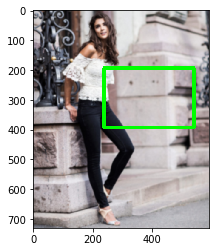

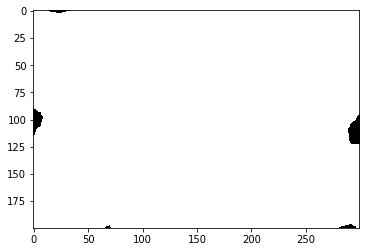

15.426119804382324


In [296]:
#演示4 按照二值图取背景区域上的固定矩阵
import time
t1=time.time()
w=300
h=200
max_area=0
max_i=0
max_j=0
img4=img.copy()
for i in range(thresh_map.shape[1]):
    #print(i)
    for j in range(thresh_map.shape[0]):
        area=np.sum(thresh_map[j:j+h,i:i+w])
        #print(area)
        if area>=max_area:
            max_area=area
            max_i=i
            max_j=j
    #         plt.imshow(cv2.cvtColor(thresh_map[0:h,i:i+w],cv2.COLOR_GRAY2RGB))
    #         plt.show()

cv2.rectangle(img4,(max_i,max_j),(max_i+w,max_j+h),(0,255,0),12)

plt.imshow(cv2.cvtColor(
            img4,
            cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(
            thresh_map[max_j:max_j+h,max_i:max_i+w],
            cv2.COLOR_BGR2RGB))
plt.show()
print('耗时：',time.time()-t1)

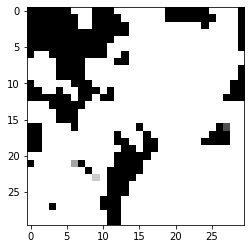

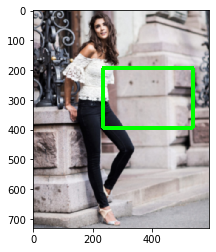

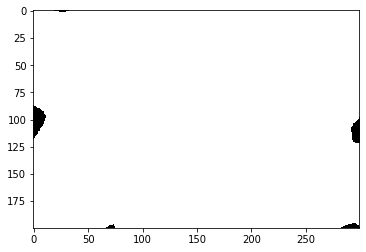

耗时： 0.4095799922943115


In [301]:
#演示5 缩减计算时间
t1=time.time()

w=300
h=200
max_area=0
max_i=0
max_j=0
img4=img.copy()

#
H,W,N=img4.shape
T=30

#缩小
thresh_map2=cv2.resize(thresh_map, (T,T), interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(
            thresh_map2,
            cv2.COLOR_BGR2RGB))
plt.show()

#缩小比例
scale_h=T/H
scale_w=T/W
#缩小后的宽高
h2=int(h*scale_h)
w2=int(w*scale_w)

for i in range(thresh_map2.shape[1]):
    #print(i)
    for j in range(thresh_map2.shape[0]):
        area=np.sum(thresh_map2[j:j+h2,i:i+w2])
        #print(area)
        if area>=max_area:
            max_area=area
            max_i=i
            max_j=j

#放大
max_i=int(max_i/scale_w)
max_j=int(max_j/scale_h)

cv2.rectangle(img4,(max_i,max_j),(max_i+w,max_j+h),(0,255,0),12)

plt.imshow(cv2.cvtColor(
            img4,
            cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(
            thresh_map[max_j:max_j+h,max_i:max_i+w],
            cv2.COLOR_BGR2RGB))
plt.show()
print('耗时：',time.time()-t1)

# 绘制汉字

In [402]:
from PIL import Image, ImageDraw, ImageFont

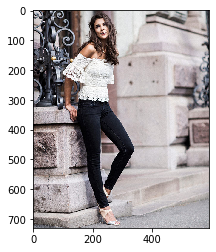

In [403]:
img = cv2.imread('img/Maryam-Razavi_pitsitoppi590.jpg')
 
# PIL图片上打印汉字
font = ImageFont.truetype("/System/Library/Fonts/Supplemental/Songti.ttc",80, encoding="utf-8") # 参数1：字体文件路径，参数2：字体大小
#print(font.getsize("时尚杂志封面"))
FW,FH=font.getsize("时尚杂志封面")

text_image = Image.fromarray(np.zeros((FH,FW,3), np.uint8))

draw = ImageDraw.Draw(text_image)
draw.text((0, 0), "时尚杂志封面", (255, 0, 0), font=font) # 参数1：打印坐标，参数2：文本，参数3：字体颜色，参数4：字体


# PIL图片转cv2 图片
text_image = cv2.cvtColor(np.array(text_image), cv2.COLOR_RGB2BGR)

#img[0:FH,0:FW]=text_image

plt.imshow(cv2.cvtColor(
            img,
            cv2.COLOR_BGR2RGB))
plt.show()

In [404]:
bg=img[0:FH,0:FW].copy()
for i in range(text_image.shape[0]):
    for j in range(text_image.shape[1]):
        if np.sum(text_image[i,j])==0:
            text_image[i,j]=bg[i,j]

In [405]:
img[0:FH,0:FW]=text_image

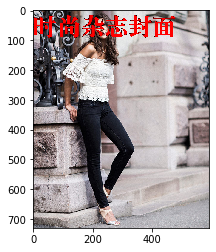

In [406]:
plt.imshow(cv2.cvtColor(
            img,
            cv2.COLOR_BGRA2RGB))
plt.show()